In [3]:
#Importing the libraries
import polars as pl
import glob as gb

In [6]:
#Reading files from path that are of .csv type

path = "C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\"

files = gb.glob(path + "*.csv")
files

['C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_August_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_December_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_February_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_January_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_July_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_June_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_March_2019.csv',
 'C:\\Users\\kammi\\Downloads\\Pandas-Data-Science-Tasks-master\\SalesAna

In [12]:
#Creating empty polars dataframe
all_data = pl.DataFrame()


In [19]:
#Combining files to make a single dataframe

for file in files:
    df = pl.read_csv(file, infer_schema_length=10000)
    all_data = pl.concat([all_data, df])



In [ ]:
#Cleaning the data of nulls, fixing the data types, removing invalid data rows

In [30]:
all_data = all_data.filter(pl.col('Order ID').is_not_null())

In [35]:
all_data = all_data.filter(pl.col('Quantity Ordered') != "Quantity Ordered")

In [37]:
all_data.select(pl.col('Quantity Ordered').cast(pl.Int32))

Quantity Ordered
i32
2
1
1
1
1
1
1
1
1


In [42]:
all_data = all_data.with_columns(pl.col('Quantity Ordered').cast(pl.Int32))

In [43]:
all_data = all_data.with_columns(pl.col('Price Each').cast(pl.Float64))

In [54]:
all_data

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
str,str,i32,f64,str,str
"""176558""","""USB-C Charging…",2,11.95,"""04/19/19 08:46…","""917 1st St, Da…"
"""176559""","""Bose SoundSpor…",1,99.99,"""04/07/19 22:30…","""682 Chestnut S…"
"""176560""","""Google Phone""",1,600.0,"""04/12/19 14:38…","""669 Spruce St,…"
"""176560""","""Wired Headphon…",1,11.99,"""04/12/19 14:38…","""669 Spruce St,…"
"""176561""","""Wired Headphon…",1,11.99,"""04/30/19 09:27…","""333 8th St, Lo…"
"""176562""","""USB-C Charging…",1,11.95,"""04/29/19 13:03…","""381 Wilson St,…"
"""176563""","""Bose SoundSpor…",1,99.99,"""04/02/19 07:46…","""668 Center St,…"
"""176564""","""USB-C Charging…",1,11.95,"""04/12/19 10:58…","""790 Ridge St, …"
"""176565""","""Macbook Pro La…",1,1700.0,"""04/24/19 10:38…","""915 Willow St,…"


In [72]:
print(all_data.head(2))

shape: (2, 6)
┌──────────┬────────────────────────────┬──────────────────┬────────────┬────────────────┬─────────────────────────────┐
│ Order ID ┆ Product                    ┆ Quantity Ordered ┆ Price Each ┆ Order Date     ┆ Purchase Address            │
│ ---      ┆ ---                        ┆ ---              ┆ ---        ┆ ---            ┆ ---                         │
│ str      ┆ str                        ┆ i32              ┆ f64        ┆ str            ┆ str                         │
╞══════════╪════════════════════════════╪══════════════════╪════════════╪════════════════╪═════════════════════════════╡
│ 176558   ┆ USB-C Charging Cable       ┆ 2                ┆ 11.95      ┆ 04/19/19 08:46 ┆ 917 1st St, Dallas, TX      │
│          ┆                            ┆                  ┆            ┆                ┆ 75001                       │
│ 176559   ┆ Bose SoundSport Headphones ┆ 1                ┆ 99.99      ┆ 04/07/19 22:30 ┆ 682 Chestnut St, Boston, MA │
│          ┆      

In [106]:
all_data = all_data.with_columns(pl.col('Order Date').str.extract("^([0-9]+)").cast(pl.Int64).alias("Month"))

In [107]:
all_data = all_data.with_columns(pl.col('Order Date').str.extract("[0-9]+/+([0-9]+)").cast(pl.Int64).alias("Date"))

In [92]:
all_data = all_data.with_columns(pl.col('Order Date').str.extract("[0-9/]+ +([0-9]+)+:").cast(pl.Int64).alias("Hour"))

In [98]:
all_data = all_data.with_columns(pl.col('Order Date').str.extract("[0-9/ ]+[0-9]+:+([0-9]+)+").cast(pl.Int64).alias("Minute"))

In [101]:
all_data = all_data.with_columns((pl.col('Quantity Ordered') * pl.col('Price Each')).alias('Total Sale'))

# What was the best month for sales? How much was earned that month?

In [137]:
sales_by_month = all_data.group_by("Month").agg(pl.sum("Total Sale")).sort('Month')
print(sales_by_month)

shape: (12, 2)
┌───────┬────────────┐
│ Month ┆ Total Sale │
│ ---   ┆ ---        │
│ i64   ┆ f64        │
╞═══════╪════════════╡
│ 1     ┆ 1.8223e6   │
│ 2     ┆ 2.2020e6   │
│ 3     ┆ 2.8071e6   │
│ 4     ┆ 3.3907e6   │
│ …     ┆ …          │
│ 9     ┆ 2.0976e6   │
│ 10    ┆ 3.7367e6   │
│ 11    ┆ 3.1996e6   │
│ 12    ┆ 4.6134e6   │
└───────┴────────────┘


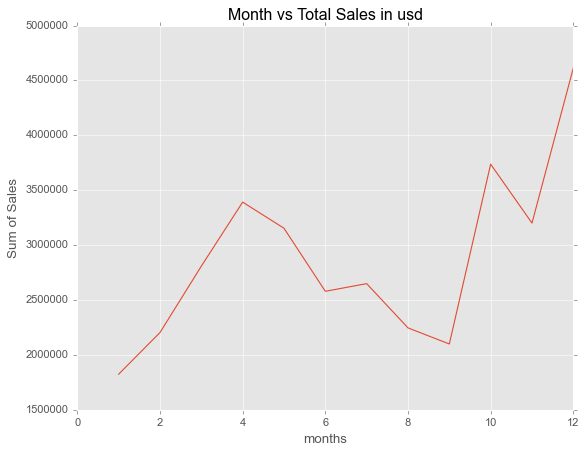

In [136]:
import matplotlib.pyplot as plt

plt.plot(sales_by_month.select('Month'), sales_by_month.select('Total Sale'))
plt.xlabel("months")
plt.ylabel("Sum of Sales")
plt.title("Month vs Total Sales in usd")
plt.style.use('seaborn')

# December is the best month for sales with a total sale of 4.6134e6

# What city had the highest number of sales?

In [145]:
#Creating the state and city fields
all_data = all_data.with_columns(pl.col('Purchase Address').str.extract("[0-9 A-Za-z]+, +([A-Za-z ]+)+,").alias("City"), 
                      pl.col('Purchase Address').str.extract("[0-9 A-Za-z]+, +[A-Za-z ]+, ([A-Z]+)+").alias("State"))

In [157]:
all_data = all_data.with_columns((pl.col("City") + " (" +pl.col('State') + ")").alias('state_city')).drop(['City', 'State'])

In [163]:
city_by_sales = all_data.group_by("state_city").agg(pl.sum("Total Sale")).sort("state_city")
city_by_sales

state_city,Total Sale
str,f64
"""Atlanta (GA)""",2.7955e6
"""Austin (TX)""",1.8196e6
"""Boston (MA)""",3.6616e6
"""Dallas (TX)""",2767975.4
"""Los Angeles (C…",5.4526e6
"""New York City …",4.6643e6
"""Portland (ME)""",449758.27
"""Portland (OR)""",1.8707e6
"""San Francisco …",8.2622e6


In [187]:
print(city_by_sales.sort("Total Sale", descending=True).head(1))

shape: (1, 2)
┌────────────────────┬────────────┐
│ state_city         ┆ Total Sale │
│ ---                ┆ ---        │
│ str                ┆ f64        │
╞════════════════════╪════════════╡
│ San Francisco (CA) ┆ 8.2622e6   │
└────────────────────┴────────────┘


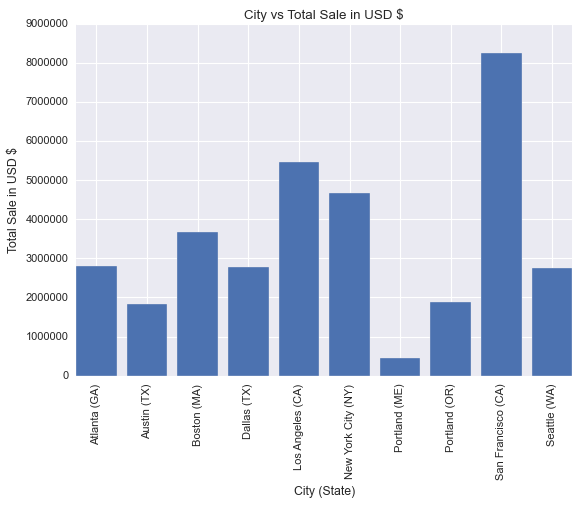

In [180]:
plt.bar(city_by_sales.to_dict()['state_city'], city_by_sales.to_dict()['Total Sale'])
plt.xticks(city_by_sales.to_dict()['state_city'], rotation = 'vertical')
plt.xlabel("City (State)")
plt.ylabel("Total Sale in USD $")
plt.title("City vs Total Sale in USD $")
plt.style.use('seaborn')

#The city with the highest amount of sale is San Francisco (CA) ┆ $8.2622e6  

# What time should we display advertisements to maximize likelihood of customer's buying product

In [191]:
all_data

Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Month,Hour,Minute,Total Sale,state_city
str,str,i32,f64,str,str,i64,i64,i64,i64,f64,str
"""176558""","""USB-C Charging…",2,11.95,"""04/19/19 08:46…","""917 1st St, Da…",19,4,8,46,23.9,"""Dallas (TX)"""
"""176559""","""Bose SoundSpor…",1,99.99,"""04/07/19 22:30…","""682 Chestnut S…",7,4,22,30,99.99,"""Boston (MA)"""
"""176560""","""Google Phone""",1,600.0,"""04/12/19 14:38…","""669 Spruce St,…",12,4,14,38,600.0,"""Los Angeles (C…"
"""176560""","""Wired Headphon…",1,11.99,"""04/12/19 14:38…","""669 Spruce St,…",12,4,14,38,11.99,"""Los Angeles (C…"
"""176561""","""Wired Headphon…",1,11.99,"""04/30/19 09:27…","""333 8th St, Lo…",30,4,9,27,11.99,"""Los Angeles (C…"
"""176562""","""USB-C Charging…",1,11.95,"""04/29/19 13:03…","""381 Wilson St,…",29,4,13,3,11.95,"""San Francisco …"
"""176563""","""Bose SoundSpor…",1,99.99,"""04/02/19 07:46…","""668 Center St,…",2,4,7,46,99.99,"""Seattle (WA)"""
"""176564""","""USB-C Charging…",1,11.95,"""04/12/19 10:58…","""790 Ridge St, …",12,4,10,58,11.95,"""Atlanta (GA)"""
"""176565""","""Macbook Pro La…",1,1700.0,"""04/24/19 10:38…","""915 Willow St,…",24,4,10,38,1700.0,"""San Francisco …"


In [216]:
product_by_hour = all_data.group_by("Hour", "Product").agg(pl.sum("Quantity Ordered")).sort("Product", "Quantity Ordered", descending = True).group_by("Product").head(1)

In [232]:
# The below table describes the hour of peak sale of specifc product
product_by_hour.select(['Product', 'Hour'])

Product,Hour
str,i64
"""AAA Batteries …",19
"""Apple Airpods …",12
"""AA Batteries (…",20
"""ThinkPad Lapto…",19
"""iPhone""",12
"""USB-C Charging…",11
"""Vareebadd Phon…",11
"""Bose SoundSpor…",12
"""Lightning Char…",19


Text(0.5, 1.0, 'Product vs Hour')

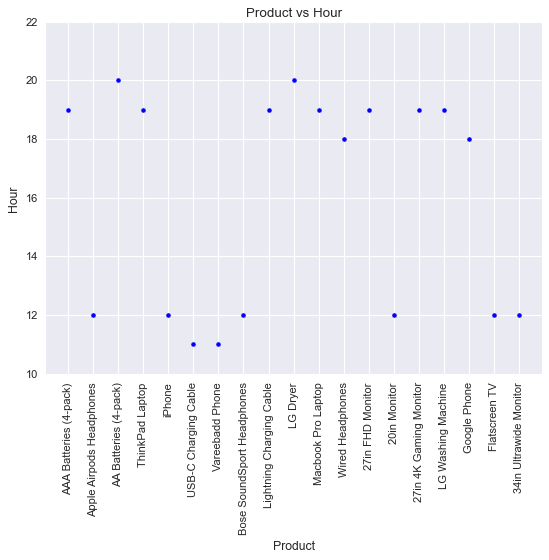

In [227]:
plt.scatter(product_by_hour.select(['Product', 'Hour']).to_dict()['Product'], product_by_hour.select(['Product', 'Hour']).to_dict()['Hour'])
plt.xticks(product_by_hour.select(['Product', 'Hour']).to_dict()['Product'], rotation = 'vertical')
plt.xlabel('Product')
plt.ylabel('Hour')
plt.title('Product vs Hour')

# What products are most often sold together

In [299]:
orderid_and_products = all_data.select(["Order ID", "Product"]).unique().with_columns(Product1= pl.lit('Product')).pivot(values = "Product", index = 'Order ID', columns = "Product1", aggregate_function = pl.col("Product").unique())

In [334]:
combined_product_count = orderid_and_products.with_columns(pl.col("Product").cast(pl.List(pl.Utf8)).list.join(", ")).unique().group_by("Product").agg(pl.count().alias('Count')).sort("Count", descending = True).filter(pl.col("Product").str.contains(","))

In [335]:
combined_product_count.head(20)

Product,Count
str,u32
"""Google Phone, …",466
"""iPhone, Lightn…",460
"""Lightning Char…",435
"""USB-C Charging…",403
"""iPhone, Wired …",202
"""Wired Headphon…",172
"""Vareebadd Phon…",162
"""Google Phone, …",160
"""USB-C Charging…",156


Text(0.5, 1.0, 'Products brought together vs Number of Orders')

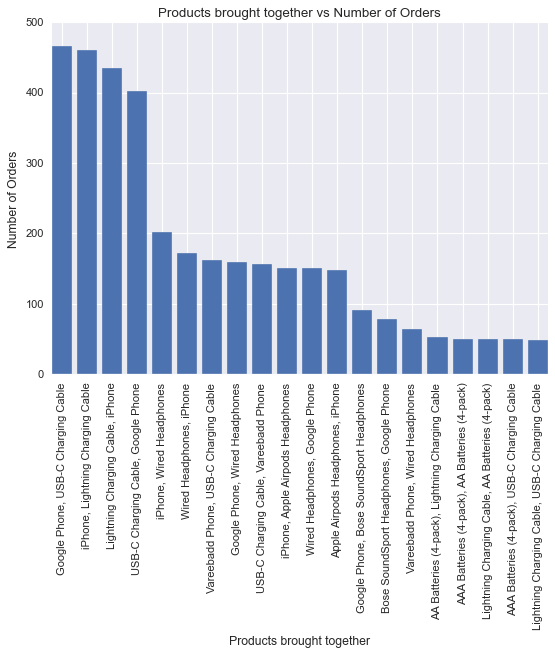

In [337]:
plt.bar(combined_product_count.head(20).to_dict()["Product"], combined_product_count.head(20).to_dict()["Count"])
plt.xticks(combined_product_count.head(20).to_dict()["Product"], rotation = 'vertical')
plt.xlabel("Products brought together")
plt.ylabel("Number of Orders")
plt.title("Products brought together vs Number of Orders")